In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%pylab inline
plt.rcParams['figure.figsize']= 10,7.5
plt.rcParams['axes.grid']= True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [2]:
os.getcwd()

'C:\\Users\\Freeware Sys'

In [3]:
os.chdir("F:\Analytx Labs\DSP Class 14\DSP Class 14 files\Case Study - HR Analytics")

In [4]:
os.getcwd()

'F:\\Analytx Labs\\DSP Class 14\\DSP Class 14 files\\Case Study - HR Analytics'

In [5]:
Data=pd.read_csv("HR_comma_sep.csv")

In [6]:
Data.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
10445,0.55,0.40,5,219,4,0,0,0,IT,medium
12720,0.42,0.49,2,139,3,0,1,0,hr,low
3190,0.55,0.63,4,218,2,0,0,0,management,medium
2213,0.65,0.93,4,270,2,0,0,0,sales,medium
8878,0.66,0.77,5,236,3,0,0,0,sales,high
4352,0.44,0.68,2,120,2,0,0,0,marketing,medium
128,0.09,0.82,6,250,4,0,1,0,support,low
13878,0.62,0.82,3,204,10,0,0,0,accounting,medium
9266,0.76,0.55,4,163,2,1,0,0,hr,medium
10908,0.47,0.46,2,152,2,0,0,0,IT,medium


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [50]:
df.sample(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
13359,0.72,0.53,3,179,3,0,0,0,support,low
1776,0.43,0.47,2,248,2,0,1,0,sales,medium
13259,0.29,0.39,6,105,6,0,0,0,technical,medium
8470,0.71,0.80,5,192,3,0,0,0,RandD,medium
13999,0.82,0.56,2,227,5,1,0,0,management,high


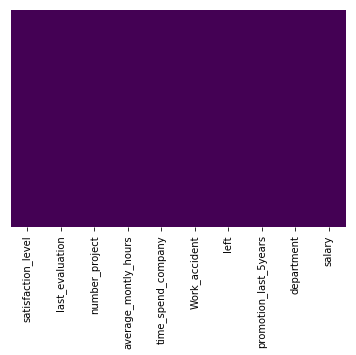

In [12]:
#to check for missing values using heatmap
sns.heatmap(Data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

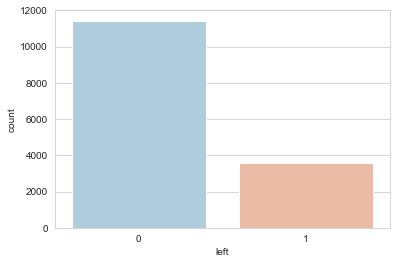

In [13]:
#Exploratory Data Analysis

#--To get the count of the people who left the company

sns.set_style('whitegrid')
sns.countplot(x='left', data= Data, palette='RdBu_r')


In [15]:
# Matrix display of people who left the company
HR_Left=pd.DataFrame(Data.left.value_counts())
HR_Left

,left
0,11428
1,3571


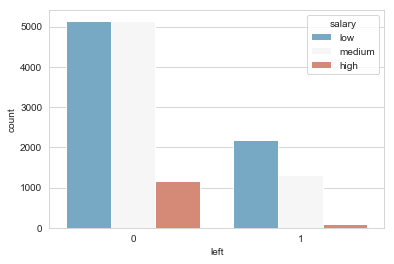

In [16]:
#-- What is the churn of salary for the people who left the organization

sns.set_style('whitegrid')
sns.countplot(x='left',hue='salary',data=Data, palette='RdBu_r' )

In [34]:
#Matrix representation of salary
Left_Salary=Data[['salary','left']].groupby(['salary','left']).size().reset_index()

In [35]:
Left_Salary

,salary,left,0
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [36]:
Left_Salary.columns=['salary','left','count'] #Assigning names to columns using .columns funtion

In [37]:
Left_Salary

,salary,left,count
0,high,0,1155
1,high,1,82
2,low,0,5144
3,low,1,2172
4,medium,0,5129
5,medium,1,1317


In [41]:
#TEST
pd.crosstab(Data['salary'], Data['left']).apply(lambda x:x/x.sum(), axis=1)#high=1155/1155+82, low=82/82+5144

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


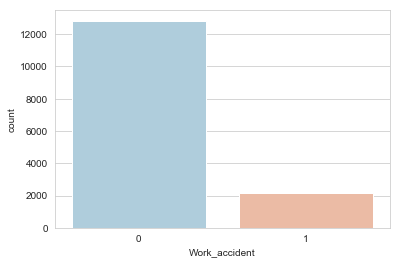

In [43]:
#-- We will check the count of people who had encoutered work accident
sns.set_style('whitegrid')
sns.countplot(x='Work_accident', data=Data, palette='RdBu_r')

In [44]:
#matrix Representation of people encountered work accident
Work_Acc= pd.DataFrame(Data.Work_accident.value_counts())
Work_Acc

,Work_accident
0,12830
1,2169


In [49]:
# --Check for the people who left the company after work accident
Left_Acc=Data[['Work_accident', 'left']].groupby(['Work_accident', 'left']).size().reset_index()

In [50]:
Left_Acc

,Work_accident,left,0
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


In [51]:
#Assigning column name
Left_Acc.columns=['Work_accident', 'left','count']
Left_Acc

,Work_accident,left,count
0,0,0,9428
1,0,1,3402
2,1,0,2000
3,1,1,169


In [53]:
#Percentage of people who left the comapny after work accident

pd.crosstab(Data['Work_accident'], Data['left']).apply(lambda x:x/x.sum(), axis=1)

left,0,1
Work_accident,,
0,0.734840,0.265160
1,0.922084,0.077916


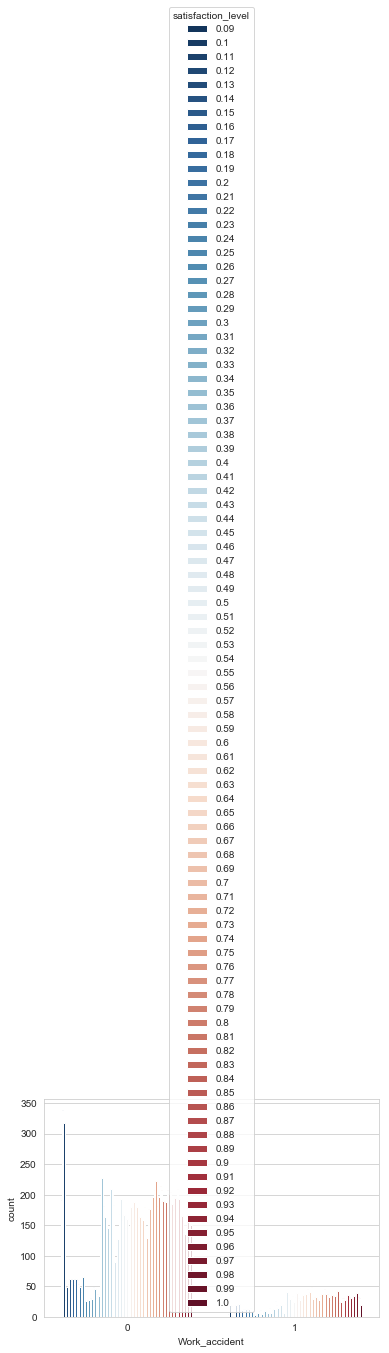

In [54]:
# -- To check the satisfaction level of employees after work accident
sns.setstyle=('whitegrid')
sns.countplot(x='Work_accident', hue='satisfaction_level', data=Data, palette='RdBu_r')

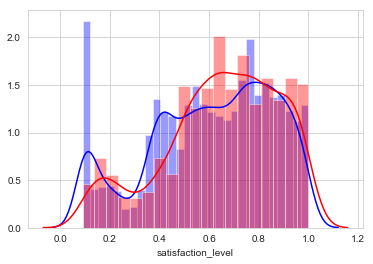

In [58]:
sns.distplot(Data[Data.Work_accident==0]['satisfaction_level'], color='b')
sns.distplot(Data[Data.Work_accident==1]['satisfaction_level'], color='r')

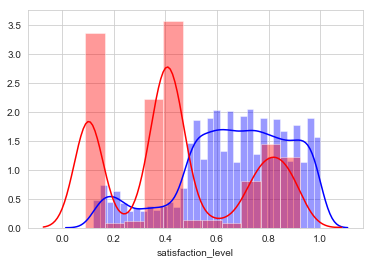

In [68]:
#-- We will check how the satisfaction level impact the attrition i.e people leaving the company

sns.distplot(Data[Data.left==0]['satisfaction_level'], color='b')
sns.distplot(Data[Data.left==1]['satisfaction_level'], color='r')

In [70]:
#Now we will find average satisfaction level of people who left (0)and who stayed back(1) 

People_Left_mean=np.mean(Data[Data.left==0]['satisfaction_level']) # mean of people who left
People_Left_mean

0.666809590479516

In [73]:
People_Left_std= np.std(Data[Data.left==0]['satisfaction_level']) #std of people who left
People_Left_std

0.21709425554771716

In [74]:
People_Stayed_Mean= np.mean(Data[Data.left==1]['satisfaction_level']) #mean of people who stayed
People_Stayed_Mean

0.44009801176140917

In [75]:
People_Stayed_Std= np.std(Data[Data.left==1]['satisfaction_level']) #std of people who stayed
People_Stayed_Std

0.2638964784854295

In [76]:
##Hypothesis testing --W ewill perform T-test

# H0: Average satisfaction level of people leaving the company is same as that of people staying back .
# H1: Average satisfaction level of people leaving the company is different as that of people staying back .

from scipy import stats
stats.ttest_ind(Data[Data.left==0]['satisfaction_level'], Data[Data.left==1]['satisfaction_level'])

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [ ]:
#in the above output, P value is 0 which means H1 is true, Satisfaction levels are different